# Street network figure-ground diagrams

Author: [Geoff Boeing](https://geoffboeing.com/)

Use OSMnx to download square-mile city street networks and visualize them as figure-ground diagrams. Discussed in this [blog post](http://geoffboeing.com/2017/01/square-mile-street-network-visualization/).

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [1]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.15.0'

In [2]:
# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 240
dpi = 40

## Part I: create diagrams by passing in lat-long points

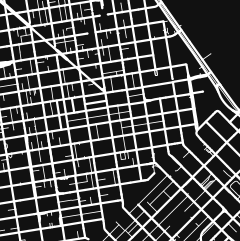

In [3]:
place = 'sf'
point = (37.793897, -122.402189)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

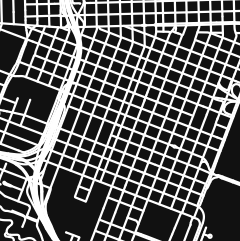

In [4]:
place = 'portland'
point = (45.517309, -122.682138)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='drive', filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

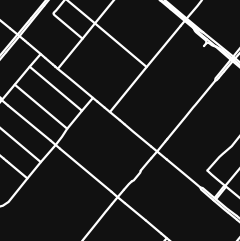

In [5]:
place = 'irvine'
point = (33.694981, -117.841375)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='drive', filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

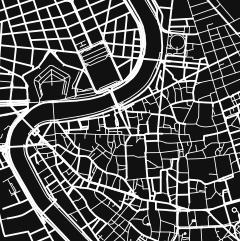

In [6]:
place = 'rome'
point = (41.901336, 12.471831)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='all', default_width=3.3, filepath=fp,
                                dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

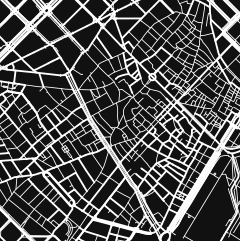

In [7]:
place = 'barcelona-gothic'
point = (41.382850, 2.174192)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='all', default_width=3.3, filepath=fp,
                                dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

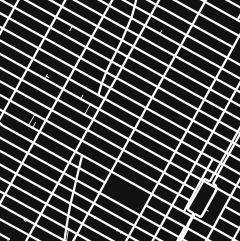

In [8]:
place = 'nyc'
point = (40.757920, -73.983393)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

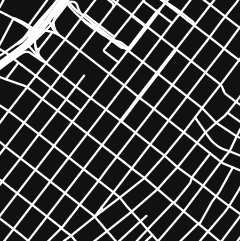

In [9]:
place = 'los-angeles'
point = (34.047404, -118.253146)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='drive', filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

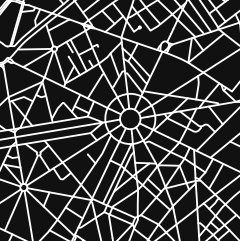

In [10]:
place = 'paris'
point = (48.873702, 2.294136)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='drive', default_width=3.3, filepath=fp,
                                dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

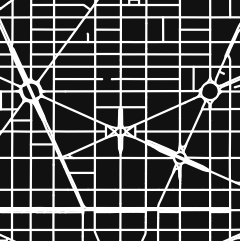

In [11]:
place = 'dc'
point = (38.907919, -77.036552)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='drive', filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

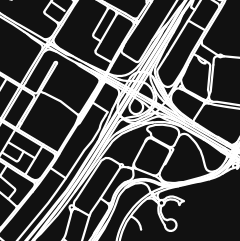

In [12]:
place = 'dubai1'
point = (25.203143, 55.270007)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='drive', filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

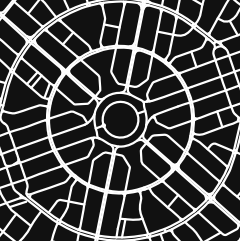

In [13]:
place = 'dubai2'
point = (25.056565, 55.207924)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='drive', filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

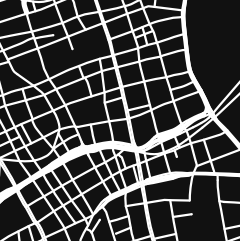

In [14]:
place = 'shanghai'
point = (31.234696, 121.481170)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='drive', filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

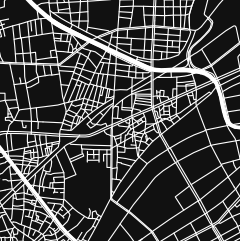

In [15]:
place = 'osaka'
point = (34.694834, 135.484761)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='drive', default_width=2,
                                filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

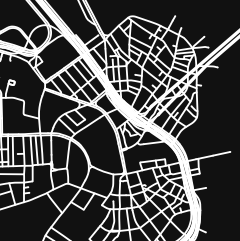

In [16]:
place = 'boston'
point = (42.362084, -71.057267)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='drive', default_width=3.3,
                                filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

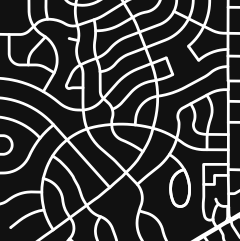

In [17]:
place = 'sacramento'
point = (38.587193, -121.372872)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, network_type='drive', default_width=5,
                                filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

## Part II: Create diagrams for any city, by just passing in a place name

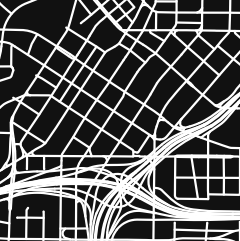

In [18]:
place = 'Atlanta, Georgia, USA'
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(address=place, network_type='drive', filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

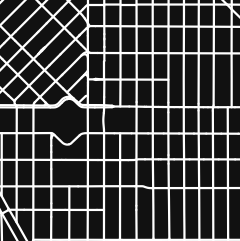

In [19]:
place = 'Denver, Colorado, USA'
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(address=place, network_type='drive', filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

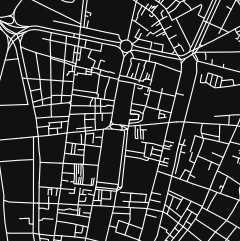

In [20]:
place = 'Sao Chingcha, Bangkok, Thailand'
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(address=place, network_type='drive', default_width=2,
                                filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

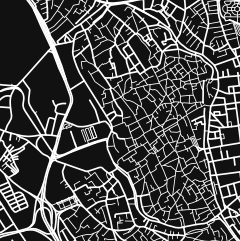

In [21]:
place = 'Medina, Tunis, Tunisia'
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(address=place, network_type='all', default_width=3,
                                filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

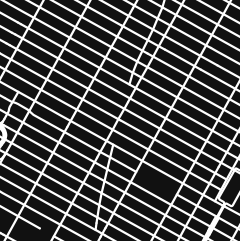

In [22]:
place = 'Times Square, New York, NY, USA'
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(address=place, network_type='drive', filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

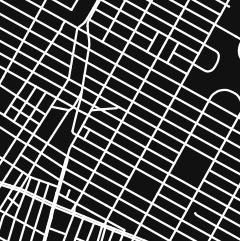

In [23]:
place = 'East Village, New York, NY, USA'
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(address=place, network_type='drive',
                                filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

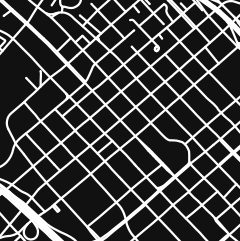

In [24]:
place = 'Charlotte, North Carolina, USA'
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(address=place, network_type='drive', filepath=fp, dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)

## Part III: Configure street width pixels

OSMnx uses the `highway` OSM tag to ascribe street widths, in pixels. You can pass in a dictionary of street widths to override the default values. Any street type that does not appear as a key in the street widths dict falls back onto the `default_width` value.

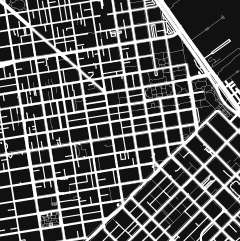

In [25]:
street_widths = {'footway' : 0.5,
                 'steps' : 0.5,
                 'pedestrian' : 0.5,
                 'path' : 0.5,
                 'track' : 0.5,
                 'service' : 2,
                 'residential' : 3,
                 'primary' : 5,
                 'motorway' : 6}
place = 'sf-custom'
point = (37.793897, -122.402189)
fp = f'./{img_folder}/{place}.{extension}'
fig, ax = ox.plot_figure_ground(point=point, filepath=fp, network_type='all', street_widths=street_widths,
                                dpi=dpi, save=True, show=False, close=True)
Image(fp, height=size, width=size)